In [278]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("/content/UTTARABANK.csv",parse_dates=['DATE'])
df.head()

#       DATE TRADING CODE  LTP*  ...   YCP  TRADE  VALUE (mn)     VOLUME
0  439 2018-05-08   UTTARABANK  24.3  ...  24.8  171.0       4.281   175638.0
1  438 2018-06-08   UTTARABANK  24.1  ...  24.5  141.0       5.471   228028.0
2  437 2018-07-08   UTTARABANK  24.6  ...  24.0  140.0       5.201   213059.0
3  436 2018-08-08   UTTARABANK  25.3  ...  24.5  360.0      11.565   462117.0
4  435 2018-09-08   UTTARABANK  26.0  ...  25.2  700.0      32.533  1272906.0

[5 rows x 12 columns]

In [279]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()

#       DATE TRADING CODE  LTP*  ...   YCP  TRADE  VALUE (mn)     VOLUME
36  403 2018-01-10   UTTARABANK  24.9  ...  25.0  248.0       6.841   271956.0
59  380 2018-01-11   UTTARABANK  29.8  ...  29.5  751.0      44.419  1522151.0
37  402 2018-02-10   UTTARABANK  25.4  ...  25.1  150.0       4.143   164334.0
79  360 2018-02-12   UTTARABANK  28.0  ...  28.1  151.0       7.421   266706.0
16  423 2018-03-09   UTTARABANK  26.8  ...  27.6  454.0      15.155   563384.0

[5 rows x 12 columns]

In [280]:
df = df.set_index('DATE')
df.head(3)

# TRADING CODE  LTP*  HIGH  ...   YCP  TRADE  VALUE (mn)     VOLUME
DATE                                      ...                                    
2018-01-10  403   UTTARABANK  24.9  25.4  ...  25.0  248.0       6.841   271956.0
2018-01-11  380   UTTARABANK  29.8  30.1  ...  29.5  751.0      44.419  1522151.0
2018-02-10  402   UTTARABANK  25.4  25.4  ...  25.1  150.0       4.143   164334.0

[3 rows x 11 columns]

In [281]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [282]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [283]:
df['volatility'] = df['volatility']*100

In [284]:
import matplotlib.pyplot as plt 

In [285]:
df=df.reset_index()['volatility']

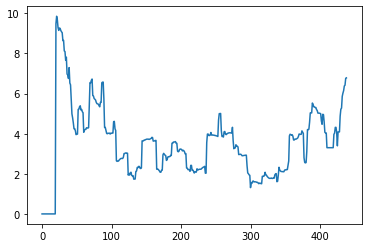

In [286]:
plt.plot(df)

In [287]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [288]:
df.shape

(439, 1)

In [289]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]




In [230]:

training_size,test_size

(307, 132)

In [290]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [291]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [292]:

print(X_train.shape), print(y_train.shape)

(206, 100)
(206,)


(None, None)

In [293]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
from google.colab import drive

In [27]:
drive.mount('/content/drive')


Mounted at /content/drive


In [294]:
filepath1 = "/content/drive/MyDrive/stock price_LSTM/modelsKUTTARABANK/model1.h5"

In [295]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [296]:
from keras.optimizers import Adam

In [297]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [298]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_28 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_29 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [299]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 6s 325ms/step - loss: 0.0640 - val_loss: 0.0182
Epoch 2/100
7/7 [==============================] - 1s 141ms/step - loss: 0.0120 - val_loss: 0.0331
Epoch 3/100
7/7 [==============================] - 1s 145ms/step - loss: 0.0076 - val_loss: 0.0193
Epoch 4/100
7/7 [==============================] - 1s 144ms/step - loss: 0.0052 - val_loss: 0.0193
Epoch 5/100
7/7 [==============================] - 1s 149ms/step - loss: 0.0055 - val_loss: 0.0234
Epoch 6/100
7/7 [==============================] - 1s 143ms/step - loss: 0.0043 - val_loss: 0.0179
Epoch 7/100
7/7 [==============================] - 1s 141ms/step - loss: 0.0049 - val_loss: 0.0208
Epoch 8/100
7/7 [==============================] - 1s 142ms/step - loss: 0.0044 - val_loss: 0.0202
Epoch 9/100
7/7 [==============================] - 1s 146ms/step - loss: 0.0043 - val_loss: 0.0195
Epoch 10/100
7/7 [==============================] - 1s 149ms/step - loss: 0.0042 - val_loss: 0.0203
Epoch 11/

In [301]:
model.save(filepath1)

In [302]:
from keras.models import load_model

In [303]:
model = load_model(filepath1)

In [304]:
import tensorflow as tf
from sklearn.metrics import r2_score

In [305]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [306]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

In [307]:
Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(Y_test,test_predict))
RMSE

0.9504568622482467

In [308]:

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test,test_predict)
print('MAE: %f' % mae)


MAE: 0.770563


In [ ]:
Y_test

array([[7.34096199],
       [7.07867747],
       [7.07867747],
       [5.68932979],
       [4.52478495],
       [4.52478495],
       [4.52478495],
       [4.52478495],
       [4.52478495],
       [4.52478495],
       [4.52478495],
       [4.52478495],
       [4.52478495],
       [4.52478495],
       [5.08360488],
       [5.13860024],
       [5.39323148],
       [5.39323148],
       [4.71640796],
       [4.44268541],
       [4.47735596],
       [4.47735596],
       [5.80715646],
       [6.49995312],
       [6.52681459],
       [7.76739046],
       [8.05581092],
       [8.29661222],
       [8.63147706],
       [8.72989142],
       [9.14967287]])

In [ ]:
test_predict

array([[20.985132],
       [20.934793],
       [20.88373 ],
       [20.83707 ],
       [20.759533],
       [20.629944],
       [20.473558],
       [20.31828 ],
       [20.183542],
       [20.078676],
       [20.005003],
       [19.958832],
       [19.934042],
       [19.924019],
       [19.922745],
       [19.939903],
       [19.970638],
       [20.012817],
       [20.057688],
       [20.07977 ],
       [20.070776],
       [20.039232],
       [19.995646],
       [19.983725],
       [20.021145],
       [20.093374],
       [20.213717],
       [20.367216],
       [20.53412 ],
       [20.701235],
       [20.854   ]], dtype=float32)

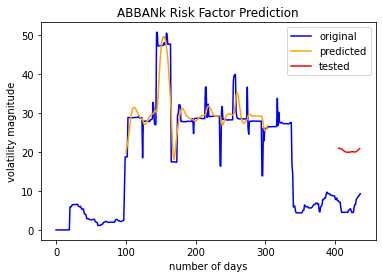

In [ ]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df),color ='blue', label ='original')
plt.plot(trainPredictPlot, color ='orange', label ='predicted')
plt.plot(testPredictPlot , color ='red', label ='tested')
#plt.show()
plt.xlabel('number of days')
plt.ylabel('volatility magnitude')
plt.title('ABBANk Risk Factor Prediction')
plt.legend(loc='best')
plt.show(block=False)


In [ ]:

x_input=test_data[32:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)


[0.416336]
101
1 day input [0.3259992  0.28677484 0.11567674 0.12112496 0.11987024 0.09479038
 0.08669877 0.08671777 0.08663881 0.08665777 0.08627742 0.08627154
 0.08615881 0.0861288  0.08617279 0.09314666 0.09975616 0.09979693
 0.12646707 0.12038247 0.11682405 0.11659178 0.11683269 0.11690975
 0.11070503 0.11095545 0.11122456 0.11157792 0.11180805 0.11667433
 0.12067503 0.12797342 0.12798686 0.12838614 0.13494534 0.13501258
 0.13582835 0.12965011 0.13106537 0.09406739 0.09081224 0.11613053
 0.12060744 0.12647958 0.15390501 0.15390562 0.15774633 0.16192915
 0.16174638 0.18075184 0.19097299 0.18860956 0.18309602 0.18309602
 0.18293775 0.17656273 0.17656273 0.17396235 0.17375912 0.17262413
 0.1722273  0.17222433 0.15676622 0.15306607 0.16102572 0.14856619
 0.14858748 0.14475851 0.13958644 0.13958644 0.1121895  0.08922551
 0.08922551 0.08922551 0.08922551 0.08922551 0.08922551 0.08922551
 0.08922551 0.08922551 0.08922551 0.10024504 0.10132951 0.10635066
 0.10635066 0.09300418 0.08760657 0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

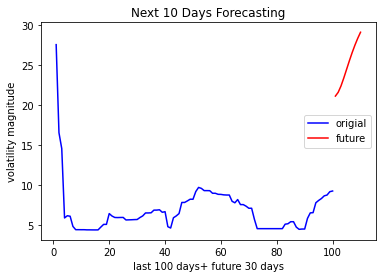

In [ ]:

plt.plot(day_new,scaler.inverse_transform(df[337:]),color ='blue', label ='origial')
plt.plot(day_pred,scaler.inverse_transform(lst_output),color='red', label='future')
plt.xlabel('last 100 days+ future 30 days')
plt.ylabel('volatility magnitude')
plt.title('Next 10 Days Forecasting')
plt.legend(loc='best')
plt.show(block=False)

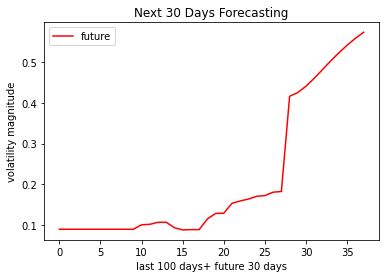

In [ ]:
df3=df.tolist()
df3.extend(lst_output)
plt.xlabel('last 100 days+ future 30 days')
plt.ylabel('volatility magnitude')
plt.title('Next 30 Days Forecasting')
plt.plot(df3[409:],color='red', label='future')
plt.legend(loc='best')
plt.show(block=False)

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

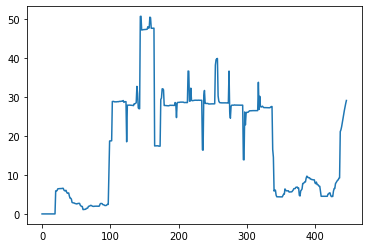

In [ ]:
plt.plot(df3)